In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
import csv
import pandas as pd
print(pd.__version__)
print(np.__version__)

2.2.2
1.26.4


In [2]:
plt.rcParams['font.family'] = 'Times New Roman' 
plt.rcParams['mathtext.fontset'] = 'stix' 
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17 

plt.rcParams['xtick.direction'] = 'in' 
plt.rcParams['ytick.direction'] = 'in' 
plt.rcParams['axes.grid'] = True 

plt.rcParams["xtick.minor.visible"] = True  
plt.rcParams["ytick.minor.visible"] = True  
plt.rcParams['xtick.top'] = True  
plt.rcParams['ytick.right'] = True  

plt.rcParams["legend.fancybox"] = False 
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.edgecolor"] = 'black'
plt.rcParams["legend.markerscale"] = 5

In [3]:
df = pd.read_csv('FIG_Data/etam_vs_Lcavity.csv', header=None)
ylist = df.iloc[0].tolist()

In [4]:
xlist = np.arange(1, 0.99 - 1e-12, -0.000005)

In [5]:
x = np.asarray(xlist, dtype=float)
y = np.asarray(ylist, dtype=float)

In [6]:
targets = np.array([0.999995, 0.99995, 0.9995, 0.995], dtype=float)

order = np.argsort(x)
x_sorted = x[order]
y_sorted = y[order]

y_targets = np.interp(targets, x_sorted, y_sorted)

In [7]:
import matplotlib.ticker as ticker

def custom_log_formatter(val, pos):
    if val == 1:
        return "1"
    elif val == 10:
        return "10"
    else:
        exponent = int(np.log10(val))
        return rf"$10^{{{exponent}}}$"

def custom_x_formatter(val, pos):
    if abs(val - 1) < 1e-10:
        return "1"
    else:
        return f"{val:.3f}"

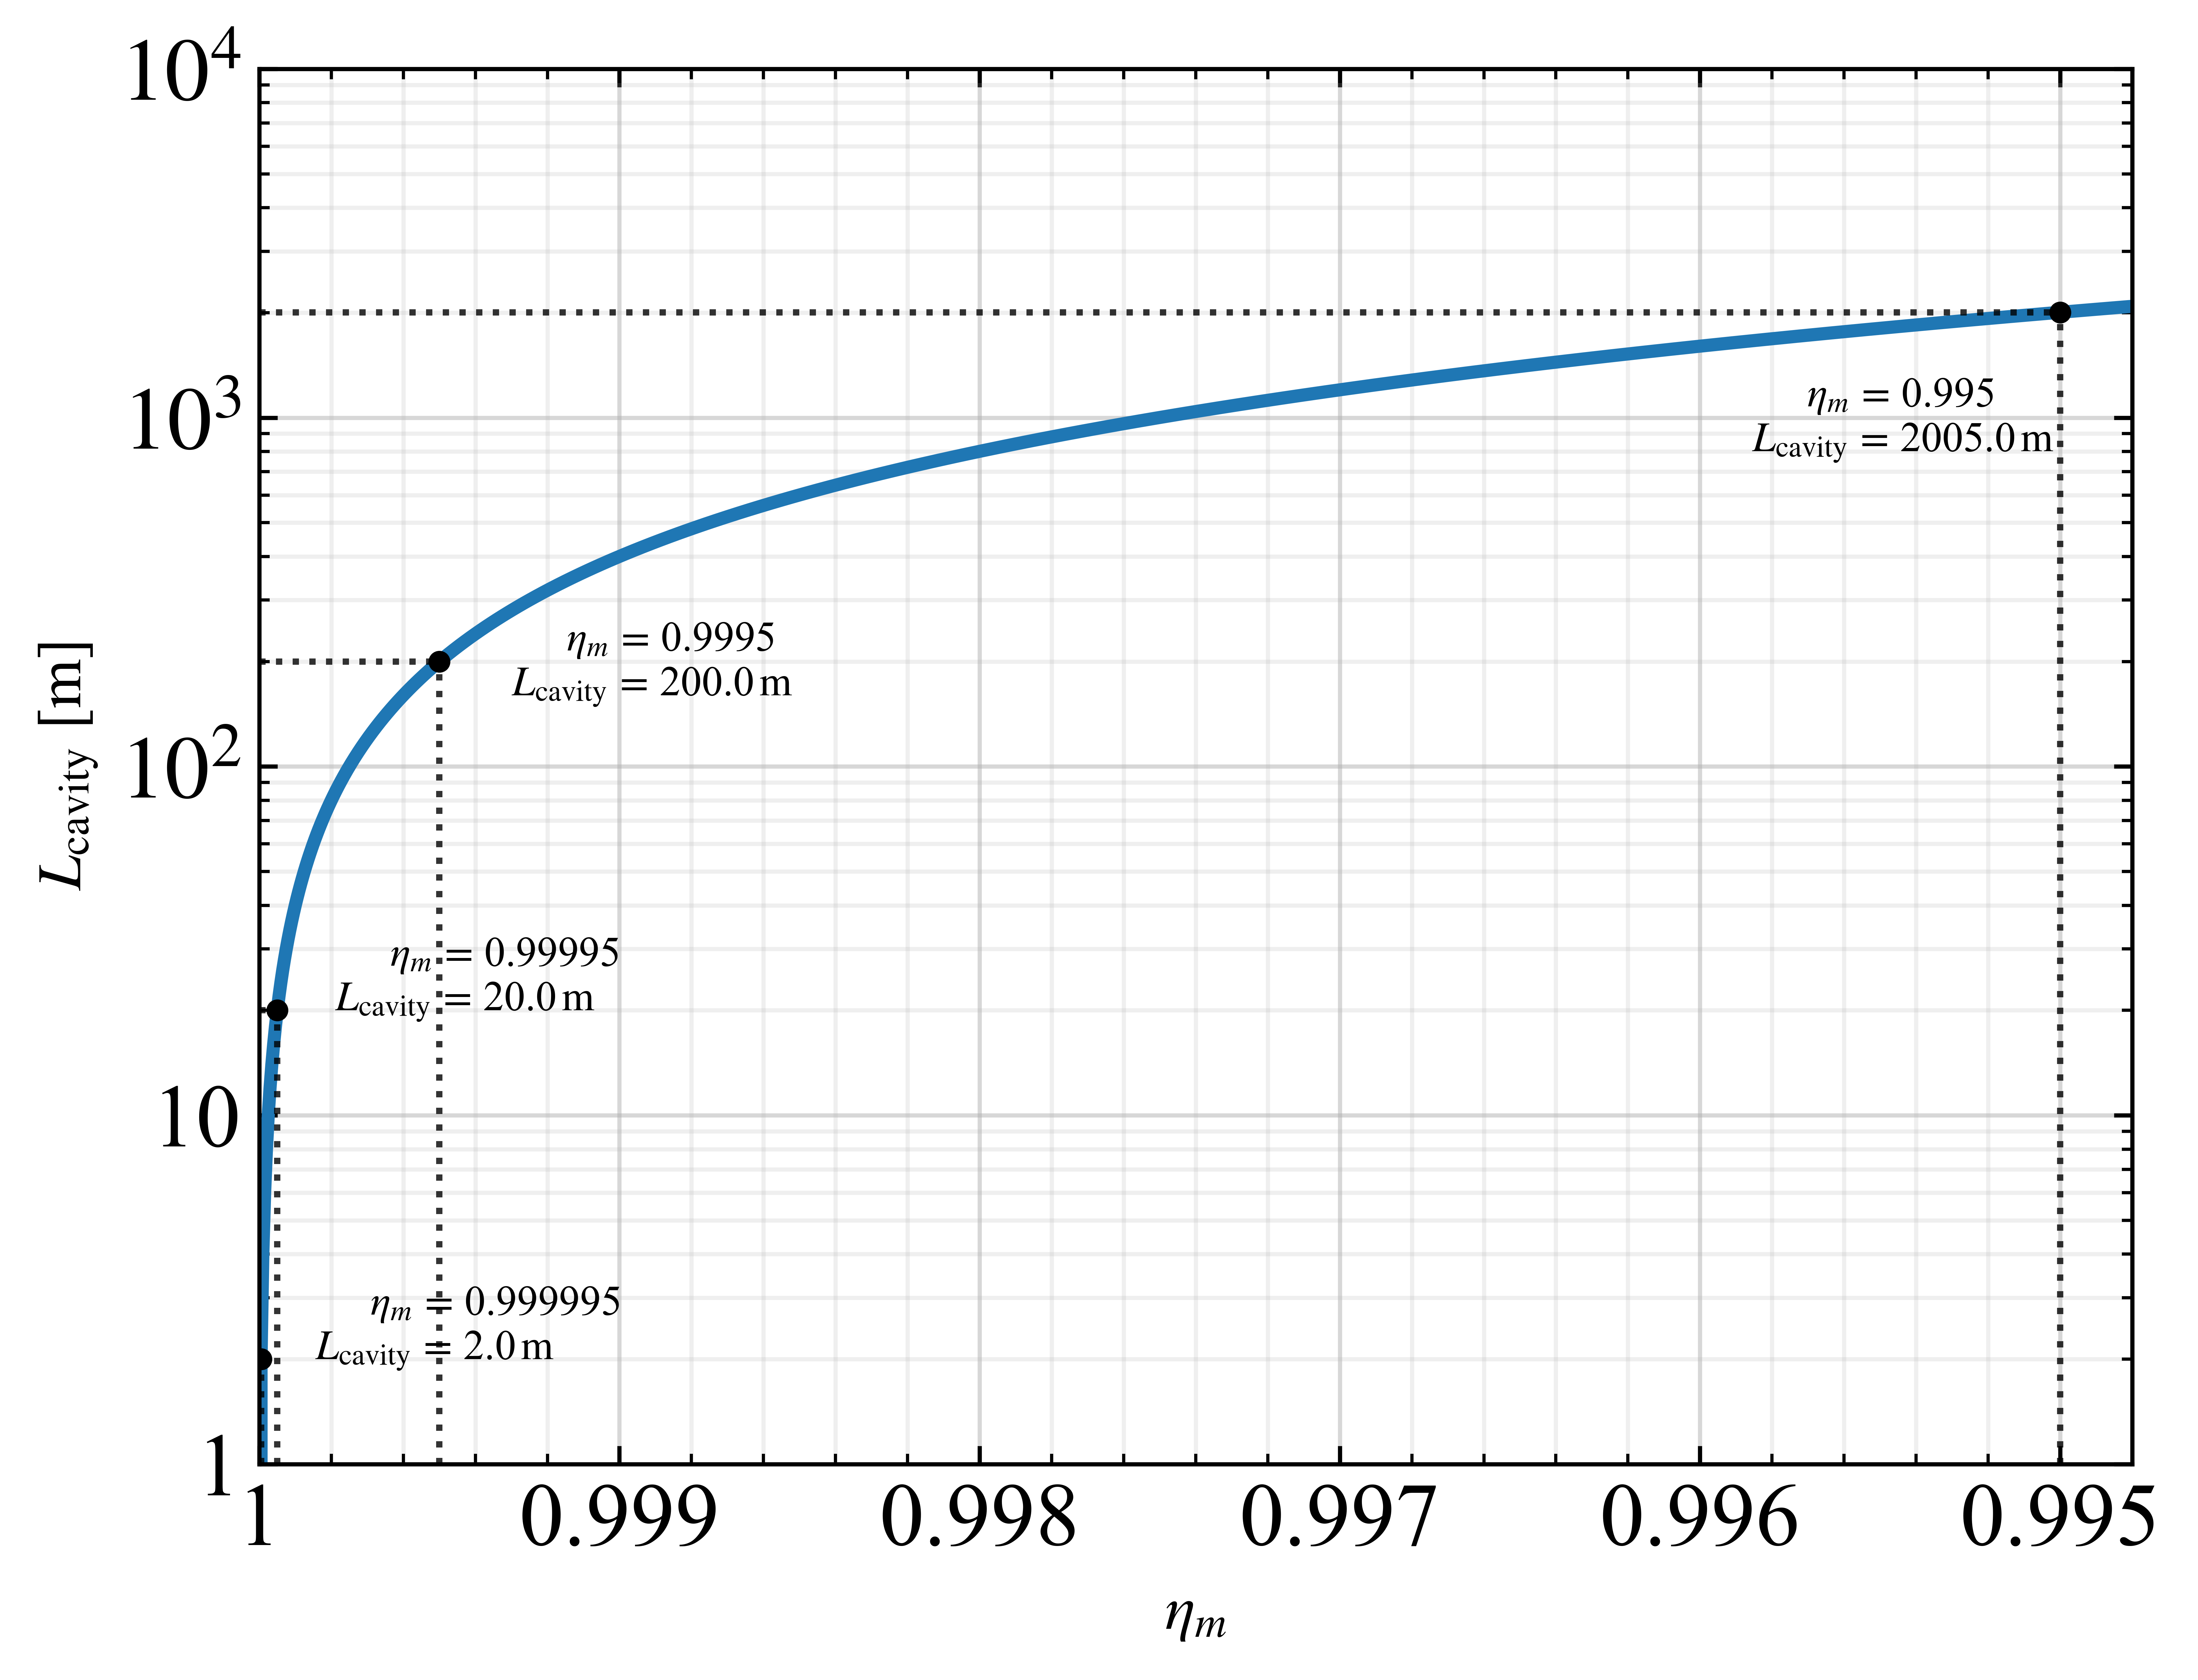

In [25]:
def main():

    fig = plt.figure(dpi=1200)
    fig_1 = fig.add_subplot(111)
    
    fig_1.plot(x, y, linewidth=2.5)
    fig_1.set_xlabel(r"$\eta_{m}$")
    fig_1.set_ylabel(r"$L_{\mathrm{cavity}}$ [m]")
    
    #fig_1.legend(ncol=2, bbox_to_anchor=(0, 1.1, 1., 0.102), loc=3)
    fig_1.grid(which='minor', alpha=0.2)
    fig_1.grid(which='major', alpha=0.5)
    fig_1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    fig_1.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    plt.ylim(1, 10000)
    #plt.xticks(xlistgrid)
    #plt.xlim(-0.02, 0.8)
    plt.xlim(1, 0.9948)  
    plt.yscale("log")

    fig_1.xaxis.set_major_formatter(
        ticker.FuncFormatter(custom_x_formatter)
    )

    fig_1.yaxis.set_major_formatter(
        ticker.FuncFormatter(custom_log_formatter)
    )

    xmin, xmax = fig_1.get_xlim() 
    ymin, ymax = fig_1.get_ylim()

    manual_labels = [
        (0.999995, 2.0, 0.99985, 1),
        (0.99995, 20.0, 0.99984, 1),
        (0.9995, 200.0, 0.9998, 0.8),
        (0.995, 2005.0, 1.00086, 0.4),
    ]

    for xt, yt, xshift, yshift in manual_labels:
        fig_1.vlines(xt, ymin=ymin, ymax=yt, linestyles=":", alpha=0.8, linewidth=1.2, color='black')
        fig_1.hlines(yt, xmin=xmin, xmax=xt, linestyles=":", alpha=0.8, linewidth=1.2, color='black')
        fig_1.scatter([xt], [yt], zorder=5, marker='o', color='black', s=10)
        fig_1.text(xt*xshift, yt*yshift, r"$\,\,\,\,\,\,\,\,\,\,\,\eta_m\,=\,$" + f"{xt}" + "\n" + r"$L_{\mathrm{cavity}}\,=\,$" + f"{yt}"+ r"$\, \mathrm{m}$",
           fontsize=8)

    plt.show()

    # save
    fig.savefig('QCNCFIG_correlation.png', bbox_inches="tight", pad_inches=0.05) 
    
if __name__ == "__main__":
    main()

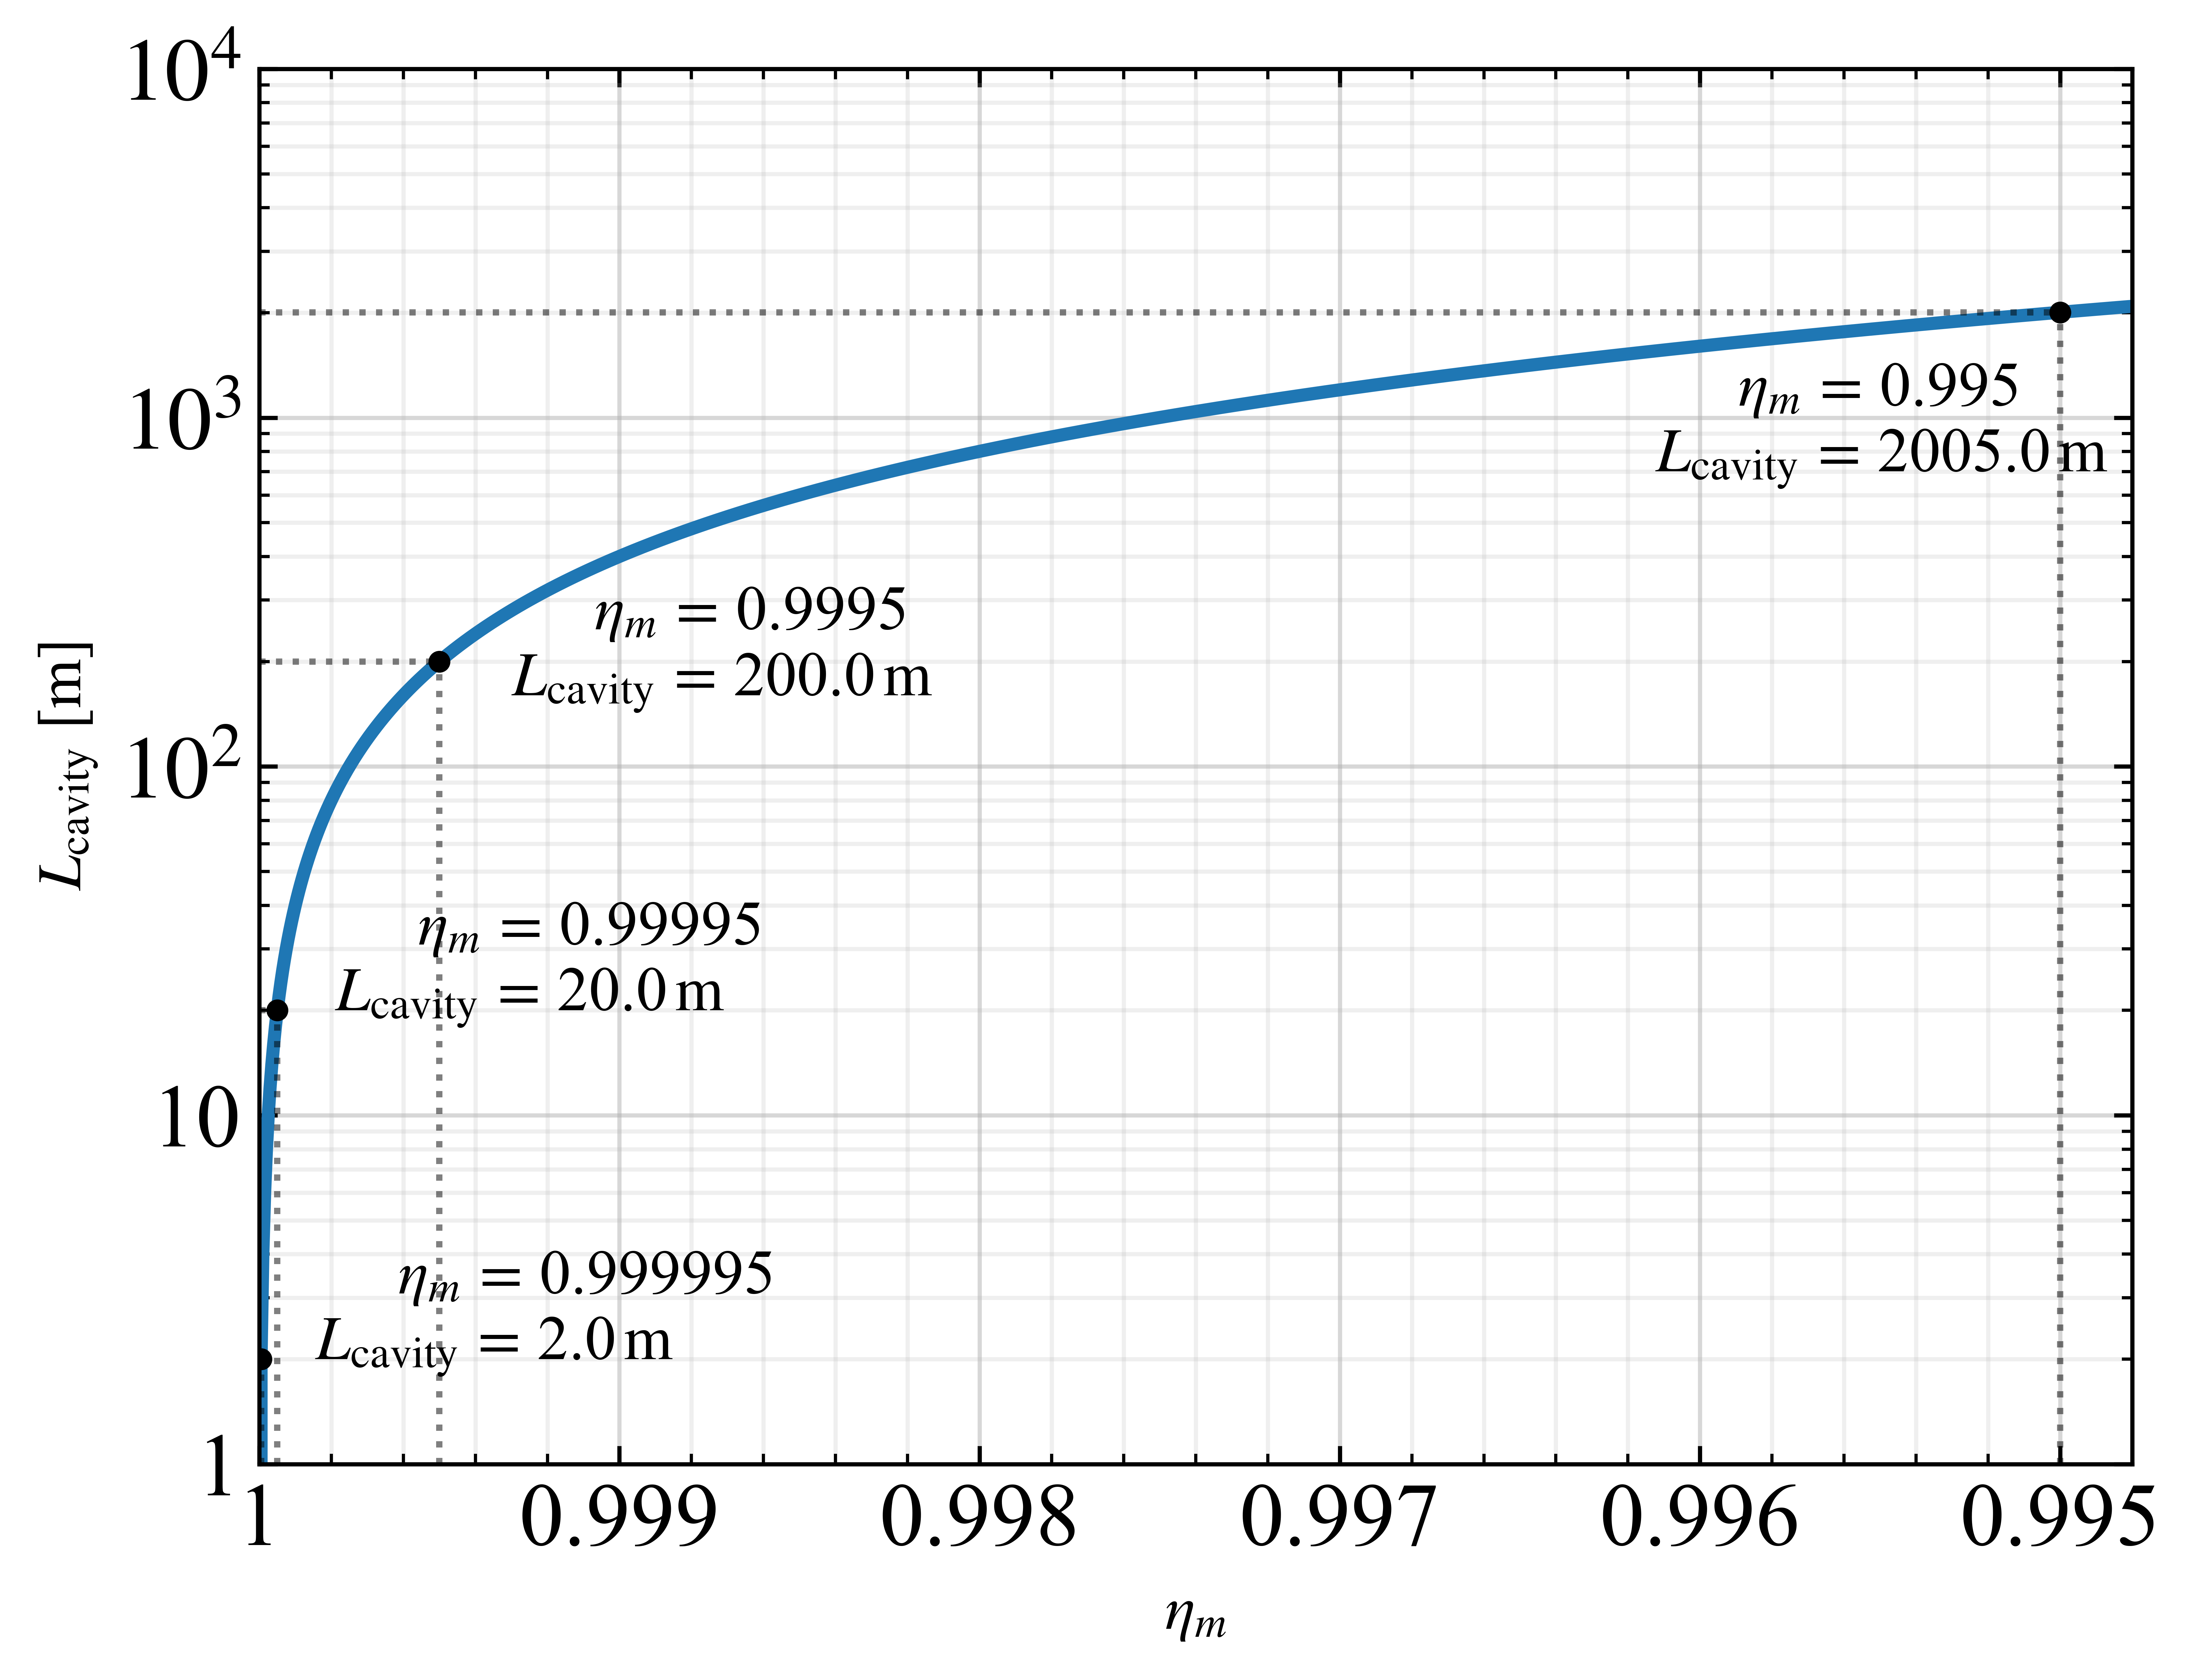

In [37]:
def main():

    fig = plt.figure(dpi=1200)
    fig_1 = fig.add_subplot(111)
    
    fig_1.plot(x, y, linewidth=2.5)
    fig_1.set_xlabel(r"$\eta_{m}$")
    fig_1.set_ylabel(r"$L_{\mathrm{cavity}}$ [m]")
    
    #fig_1.legend(ncol=2, bbox_to_anchor=(0, 1.1, 1., 0.102), loc=3)
    fig_1.grid(which='minor', alpha=0.2)
    fig_1.grid(which='major', alpha=0.5)
    fig_1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    fig_1.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    plt.ylim(1, 10000)
    #plt.xticks(xlistgrid)
    #plt.xlim(-0.02, 0.8)
    plt.xlim(1, 0.9948)  
    plt.yscale("log")

    fig_1.xaxis.set_major_formatter(
        ticker.FuncFormatter(custom_x_formatter)
    )

    fig_1.yaxis.set_major_formatter(
        ticker.FuncFormatter(custom_log_formatter)
    )

    xmin, xmax = fig_1.get_xlim() 
    ymin, ymax = fig_1.get_ylim()

    manual_labels = [
        (0.999995, 2.0, 0.99985, 1),
        (0.99995, 20.0, 0.99984, 1),
        (0.9995, 200.0, 0.9998, 0.8),
        (0.995, 2005.0, 1.00113, 0.35),
    ]

    for xt, yt, xshift, yshift in manual_labels:
        fig_1.vlines(xt, ymin=ymin, ymax=yt, linestyles=":", alpha=0.5, linewidth=1.2, color='black')
        fig_1.hlines(yt, xmin=xmin, xmax=xt, linestyles=":", alpha=0.5, linewidth=1.2, color='black')
        fig_1.scatter([xt], [yt], zorder=5, marker='o', color='black', s=10)
        fig_1.text(xt*xshift, yt*yshift, r"$\,\,\,\,\,\,\,\,\,\,\,\eta_m\,=\,$" + f"{xt}" + "\n" + r"$L_{\mathrm{cavity}}\,=\,$" + f"{yt}"+ r"$\, \mathrm{m}$",
           fontsize=12)

    plt.show()

    # save
    fig.savefig('QCNCFIG_correlation.png', bbox_inches="tight", pad_inches=0.05) 
    
if __name__ == "__main__":
    main()